<div class="alert alert-block alert-success">
<b>Comentario general del revisor</b> <a class="tocSkip"></a><br />
Status del proyecto: <b>Aprobado</b>
</div>


¡Hola!<br />
Soy **Francisco Cortés**, estoy contento de revisar tu proyecto y ser parte de tu proceso de aprendizaje.
A lo largo del texto, haré algunas observaciones sobre mejoras en el código y también haré comentarios sobre tus percepciones sobre el tema. Si existe algún error en el código, no te preocupes, estoy aquí para ayudarte a mejorarlo, en la primera iteración te lo señalaré para que tengas la oportunidad de corregirlo, pero si aún no encuentras una solución para esta tarea, te daré una pista más precisa en la próxima iteración y también algunos ejemplos prácticos. Estaré abierto a retroalimentación y discusiones sobre el tema.<br />
Encontrarás mis comentarios a continuación - **por favor no los muevas, modifiques o borres**.
Revisaré cuidadosamente tu código para comprobar que se han cumplido con los requisitos y te proporcionaré mis comentarios en cajas verdes, amarillas o rojas como esta:

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Si la ejecución fue perfecta succesfully.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Si existe alguna recomendación para que tu código mejore.
</div>

<div class="alert alert-block alert-danger">

<b>Comentario del revisor</b> <a class="tocSkip"></a>

Si existen correcciones necesarias para cumplir con los requisitos. El trabajo no puede ser aceptado si hay alguna caja roja.
</div>

Puedes responderme de la siguiente manera:

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante.</b> <a class="tocSkip"></a>
</div>

## PROYECTO VIDEO JUEGOS ICE

### Paso 1. Archivo de datos e información general

In [1]:
# Cargar las librerías que puedo necesitar
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Cargar el archivo
ice_games = pd.read_csv('/datasets/games.csv')

In [3]:
# Darle un vistazo rápido a los datos reales
ice_games.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [4]:
# Ver la cantidad de filas y columnas 
print("Filas y Columnas de Ice Games:")
ice_games.shape

Filas y Columnas de Ice Games:


(16715, 11)

In [5]:
# Hacer una inspección rápida de tipos de datos y valores nulos
print("Informacion general:")
ice_games.info()

Informacion general:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


<div style="background-color: #e7f3ff; padding: 15px; border-radius: 5px; border-left: 5px solid #2196F3;">   
    
COMENTARIOS:
    
- Sobre los valores nulos observados: 6 de las 11 columnas tienen valore nulos. 'name', 'genre' y 'year_of_release' tienen muy pocos respecto a la cantidad de valores totales. Critic_Score, User_Score y Rating tienen alrededor de la mitad de valores nulos.
  
- Sobre los tipos de datos: 'year_of_release', 'user_score' son objects, es mejor si son valores numéricos.
</div>


### Paso 2. Preparacion de los datos

**2.1 Poner los nombres de las columnas en minúsculas**

In [6]:
# Poner todos los nombres de las columnas en minúsculas
ice_games.columns = ice_games.columns.str.lower()
print(ice_games.columns)

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')


**2.2 Convertir los datos en los tipos necesarios** 

In [7]:
# Convertir year_of_release de float a Int64
ice_games['year_of_release'] = ice_games['year_of_release'].astype('Int64')

In [8]:
# Comprobar por que user_score no se lee como numero
# Mirar los valores unicos de esta columna
ice_games['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [9]:
# Reemplazar “tbd” a NaN
ice_games['user_score'] = ice_games['user_score'].replace('tbd', np.nan)
# Convertir user_score de object a float
ice_games['user_score'] = ice_games['user_score'].astype('float64')

In [10]:
# Verificar los tipos de datos de cada columna despues de los cambios
ice_games.dtypes

name                object
platform            object
year_of_release      Int64
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score       float64
user_score         float64
rating              object
dtype: object

<div style="background-color: #e7f3ff; padding: 15px; border-radius: 5px; border-left: 5px solid #2196F3;">
COMENTARIOS:
    
- Como 'year_of_release' solo tienes el año y no la fecha completa, usé Int64 y no datetime, para que pandas no completara con una fecha ficticia. Así puedo hacer operaciones simples más adelante.
  
- Para la columna de 'user_score', revisé los valores únicos, así encontré que tenía valores nombrados como tbd/to be determined, al investigar encontré que usualmente indica que en el momento de la recopilación de datos, la puntuación de usuarios aún no estaba disponible. Como no es un número, pandas lo lee como object, y por eso toda la columna queda como texto. Entonces reemplacé tbt por NaN, que pandas reconoce en cálculos y gráficos y luego lo convertí a columna numérica.
</div>

**2.3 Trabajar con los valores ausentes**

In [11]:
# Visualizar los valores nulos por columna de mayor a menor
print("Valores nulos por columna:")
print(ice_games.isna().sum().sort_values(ascending=False))
print()
print("Porcentaje de valores nulos:")
print((ice_games.isnull().sum().sort_values(ascending=False) / len(ice_games)) * 100)

Valores nulos por columna:
user_score         9125
critic_score       8578
rating             6766
year_of_release     269
name                  2
genre                 2
platform              0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
dtype: int64

Porcentaje de valores nulos:
user_score         54.591684
critic_score       51.319174
rating             40.478612
year_of_release     1.609333
name                0.011965
genre               0.011965
platform            0.000000
na_sales            0.000000
eu_sales            0.000000
jp_sales            0.000000
other_sales         0.000000
dtype: float64


In [12]:
# Eliminar filas con nulos en name y genre
ice_games = ice_games.dropna(subset=['name', 'genre'])

In [13]:
# Eliminar los registros sin año
ice_games = ice_games.dropna(subset=['year_of_release'])

In [14]:
# Mirar los valores unicos de esta columna rating
ice_games['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

In [15]:
# Nombrar los valores ausentes como "Not Rated" en la columna rating
ice_games['rating'] = ice_games['rating'].fillna('Not Rated')

In [16]:
# Verificar valores nulos finales
print("Después de limpiar:")
print(ice_games.isnull().sum())

Después de limpiar:
name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         8981
rating                0
dtype: int64


**2.4 Verificar datos duplicados**

In [17]:
# Verficar que no hayan duplicados
ice_games.duplicated().sum()

0

**2.5 Crear columna para ventas totales**

In [18]:
# Crear total_sales como suma de NA, EU, JP y Other.
ice_games['total_sales'] = (
    ice_games['na_sales'] + ice_games['eu_sales'] + ice_games['jp_sales'] + ice_games['other_sales']
)

In [19]:
# Conocer las estadísticas descriptivas de ventas:
ice_games['total_sales'].describe()

count    16444.000000
mean         0.536023
std          1.558786
min          0.000000
25%          0.060000
50%          0.170000
75%          0.470000
max         82.540000
Name: total_sales, dtype: float64

**2.6 Verificacion final antes del analisis**

In [20]:
# Verificar tipos de datos e informacion general para comprobar cambios
print("Tipos de datos:")
print(ice_games.dtypes)
print()
print("Información general del dataset:")
print(ice_games.info())

Tipos de datos:
name                object
platform            object
year_of_release      Int64
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score       float64
user_score         float64
rating              object
total_sales        float64
dtype: object

Información general del dataset:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  Int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float

In [21]:
# Verificar rangos de datos
print("Rango de años:")
print(f"Año mínimo: {ice_games['year_of_release'].min()}")
print(f"Año máximo: {ice_games['year_of_release'].max()}")

Rango de años:
Año mínimo: 1980
Año máximo: 2016


In [22]:
# Verificar valores únicos en columnas categóricas
print("Plataformas únicas:", ice_games['platform'].nunique())
print("Géneros únicos:", ice_games['genre'].nunique())
print("Ratings únicos:", ice_games['rating'].value_counts())

Plataformas únicas: 31
Géneros únicos: 12
Ratings únicos: Not Rated    6676
E            3921
T            2905
M            1536
E10+         1393
EC              8
K-A             3
AO              1
RP              1
Name: rating, dtype: int64


<div style="background-color: #e7f3ff; padding: 15px; border-radius: 5px; border-left: 5px solid #2196F3;">

COMENTARIOS:
1. Para empezar observé los valores nulos por columna y el porcentaje de esos valores en todo el DataFrame.
2. Luego eliminé las dos filas con valores nulos de las columnas name y genre, porque son clave para segmentar y la pérdida es mínima, solo 2.
3. Para la columna year_of_release, también eliminé las filas. Porque considero que mantener nulos aquí distorsionaría cualquier gráfico/consulta temporal.
4. Con user_score y critic_score, decidí dejar los valores así como ausentes porque de eliminarlos faltarían más de la mitad de valores, lo que puede generar un fuerte sesgo.
5. Revisando los valores nulos de rating veo que la columna almacena la clasificación ESRB de cada juego, y según investigué es un sistema estadounidense, entonces creo que muchas ausencias pueden deberse a lanzamientos fuera de Norteamérica. Entonces renombré los nulos como "Not Rated" por sugerencia de Dot para mantener una categoría explícita sin clasificación para el análisis, para medir y mostrar cuántos juegos no tienen rating y cómo venden.
6. Después siguiendo la guía del proyecto, calculé las ventas totales de todas las regiones y los guardé en una columna separada.
7. Hice unas verificaciones finales de varios valores.
</div>

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />
Bien hecho!<br/>

Hiciste un buen trabajo al cambiar los nombres de las columnas, sus tipos de datos y reemplazar los valores ausentes
</div>


### Paso 3: Analisis de datos

**3.1 Contar cuántos juegos fueron lanzados por año**

In [23]:
# Ver cuántos juegos se lanzaron por año
games_per_year = ice_games.groupby('year_of_release')['name'].count()
games_per_year.size

37

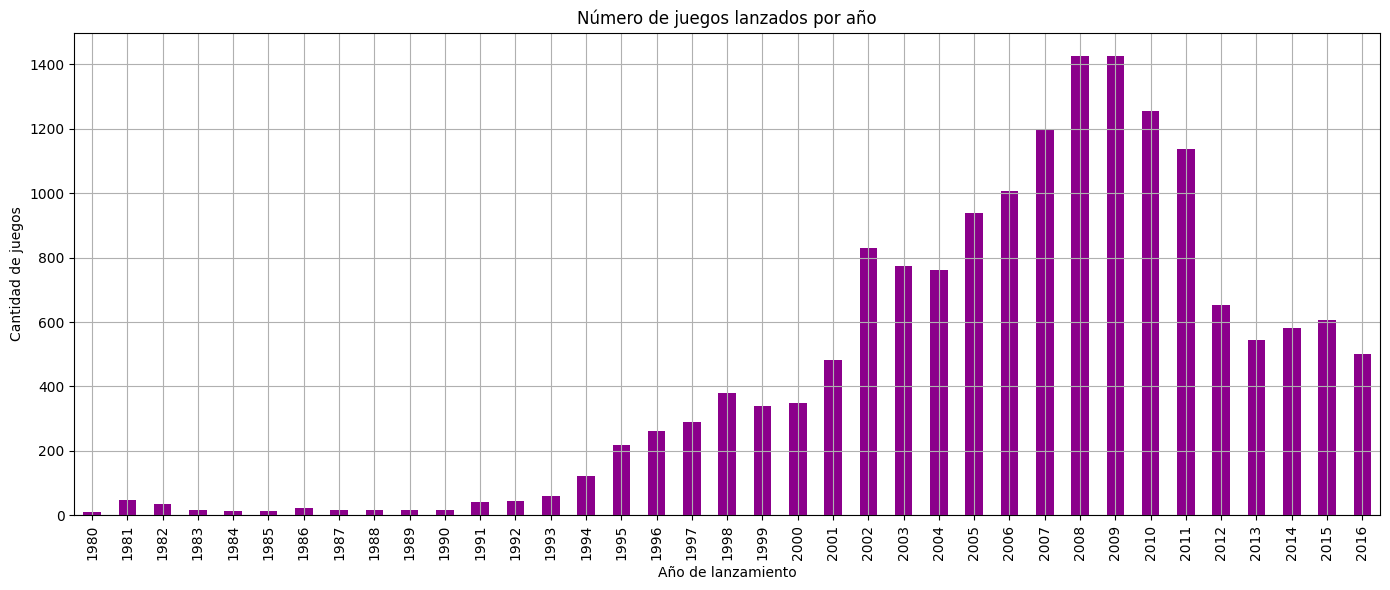

In [24]:
# Visualizar la cantidad de juegos lanzados por año
plt.figure(figsize=(14,6))
games_per_year.plot(kind='bar', color='#8B008B')
plt.title('Número de juegos lanzados por año')
plt.xlabel('Año de lanzamiento')
plt.ylabel('Cantidad de juegos')
plt.grid(True)
plt.tight_layout() 
plt.show()

<div style="background-color: #e7f3ff; padding: 15px; border-radius: 5px; border-left: 5px solid #2196F3;">

COMENTARIOS:

Cuando empecé a analizar los datos, noté que al principio entre 1980 y 1994, salían pocos juegos por año, me imagino que es porque era una industria que recién comenzaba, y seguro habían pocas consolas y un mercado limitado. Después a partir de 1995, el número de juegos nuevos creció sin parar durante más de diez años, hasta llegar a su punto máximo en 2008 y 2009, cuando salían más de 1,400 juegos por año. Después del 2009, aunque siguieron saliendo muchos juegos, noté que los números empezaron a bajar poco a poco. Tal vez la industria empezó a enfocarse más en unos pocos juegos grandes en lugar de muchos pequeños.
</div>

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />
Correcto!<br/>

Buena manera de presentar los datos, podemos ver claramente la tendencia de los videojuegos con un incremento constante en años anteriores que ha empezado a ir en declive en los últimos años
</div>


**3.2 Observar la variacion de las ventas de una plataforma a otra**

In [25]:
# Agrupar ventas por plataforma
platform_sales = (ice_games.groupby('platform')['total_sales'].sum().sort_values(ascending=False))
platform_sales.count()

31

In [26]:
#  Identificar las top plataformas
top_platforms = platform_sales.head(8)
# Porcentaje de ventas totales que representan las TOP 8
print(f"El top 8 de plataformas concentran el {(top_platforms.sum() / platform_sales.sum()) * 100}% de todas las ventas")

El top 8 de plataformas concentran el 70.052652656968% de todas las ventas


In [27]:
# Los nombres de las TOP 8 plataformas
top_platform_names = top_platforms.index.tolist()
print(top_platform_names)

['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS', 'PS4', 'GBA']


In [28]:
# Filtrar el DataFrame 
top_games = ice_games[ice_games['platform'].isin(top_platform_names)]

In [29]:
# Agrupar las ventas totales por año y por plataforma
platform_year_sales = (top_games.groupby(['year_of_release', 'platform'])['total_sales']
                       .sum()
                       .reset_index())
platform_year_sales.head()

,year_of_release,platform,total_sales
0,1985,DS,0.02
1,1994,PS,6.03
2,1995,PS,35.96
3,1996,PS,94.70
4,1997,PS,136.17


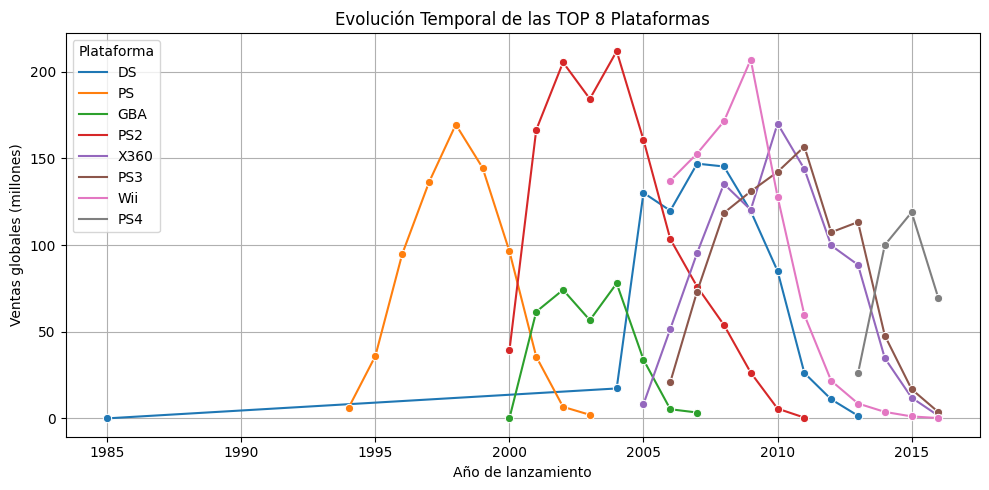

In [30]:
# Visualizar con gráfico de líneas
plt.figure(figsize=(10,5))
sns.lineplot(
    data=platform_year_sales,
    x='year_of_release', y='total_sales', hue='platform', marker='o'
)
plt.title('Evolución Temporal de las TOP 8 Plataformas')
plt.xlabel('Año de lanzamiento')
plt.ylabel('Ventas globales (millones)')
plt.legend(title='Plataforma')
plt.grid(True)
plt.tight_layout() 
plt.show()

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />
Bien hecho!<br/>

Buena manera de mostrar los datos, gracias a la gráfica nos podemos dar una idea del tiempo de vida de cada una de las plataformas
</div>


**3.3 Analizar las plataformas que solían ser populares,y los tiempos de aparición/desaparición**

In [31]:
# Comparar las plataformas que aparecen en los primeros años
first_sales_year = (
    ice_games.groupby('platform')['year_of_release']
    .min().sort_values()
)
print("Año de primera aparición de cada plataforma:")
first_sales_year

Año de primera aparición de cada plataforma:


platform
2600    1980
NES     1983
DS      1985
PC      1985
GB      1988
SNES    1990
GEN     1990
GG      1992
SCD     1993
NG      1993
SAT     1994
PS      1994
3DO     1994
TG16    1995
PCFX    1996
N64     1996
DC      1998
WS      1999
GBA     2000
XB      2000
PS2     2000
GC      2001
PSP     2004
X360    2005
PS3     2006
Wii     2006
3DS     2011
PSV     2011
WiiU    2012
PS4     2013
XOne    2013
Name: year_of_release, dtype: Int64

In [32]:
# Comparar las plataformas que aparecen en los últimos años
last_sales_year = (
    ice_games.groupby('platform')['year_of_release']
    .max().sort_values()
)
print("Año de última venta significativa de cada plataforma:")
last_sales_year

Año de última venta significativa de cada plataforma:


platform
2600    1989
GG      1992
SCD     1994
GEN     1994
NES     1994
3DO     1995
TG16    1995
NG      1996
PCFX    1996
SNES    1999
SAT     1999
WS      2001
GB      2001
N64     2002
PS      2003
GC      2007
GBA     2007
XB      2008
DC      2008
PS2     2011
DS      2013
PSP     2015
PS3     2016
PS4     2016
PSV     2016
3DS     2016
Wii     2016
WiiU    2016
X360    2016
PC      2016
XOne    2016
Name: year_of_release, dtype: Int64

In [33]:
# Analizar la duración del ciclo de vida de las plataformas
platform_lifespan = last_sales_year - first_sales_year
print("Duración del ciclo de vida de las plataformas:")
print(platform_lifespan.sort_values(ascending=False))
platform_lifespan.describe()

Duración del ciclo de vida de las plataformas:
platform
PC      31
DS      28
GB      13
X360    11
PSP     11
PS2     11
NES     11
DC      10
Wii     10
PS3     10
2600     9
SNES     9
PS       9
XB       8
GBA      7
GC       6
N64      6
3DS      5
PSV      5
SAT      5
WiiU     4
GEN      4
NG       3
XOne     3
PS4      3
WS       2
3DO      1
SCD      1
TG16     0
PCFX     0
GG       0
Name: year_of_release, dtype: Int64


count    31.000000
mean      7.612903
std       6.998464
min       0.000000
25%       3.000000
50%       6.000000
75%      10.000000
max      31.000000
Name: year_of_release, dtype: float64

<div style="background-color: #e7f3ff; padding: 15px; border-radius: 5px; border-left: 5px solid #2196F3;">

COMENTARIOS:

Para poder observar cómo varían las ventas de una plataforma a otra, agrupé las ventas totales por plataforma y de las 31 posibles seleccioné el top 8 para analizar, calculé las ventas totales por plataforma y este top 8 concentran más del 70 % de las ventas globales, lo que muestra que el mercado de videojuegos está extremadamente concentrado. Al observar la evolución temporal, es evidente que las plataformas tienen tiempos de vida muy variables. Mientras que algunas como la PC han tenido presencia durante 31 años, otras plataformas duraron apenas 1 o 2 años en el mercado. Calculé el año de aparición y desaparición de cada plataforma y la mayoría de consolas tienen ciclos de 6 a 10 años, (la mediana de duración es de 6 años y el 75% de las plataformas no supera los 10 años.) Con last_sales_year, se logra identificar que hay varias consolas que ya no tienen ventas recientes.

Plataformas extintas muy temprano (antes de 2000):
2600, GG, SCD, GEN, NES, 3DO, TG16, NG, PCFX

Plataformas extintas más recientemente (2000-2013):
SNES, SAT, WS, GB, N64, PS, GC, GBA, XB, DC, PS2, DS
</div>

**3.4 Definir el rango de años útil para modelar 2017**

In [34]:
# Definir el período de datos
target_year = 2017
years_back = 8
start_year = (target_year-1) - years_back 

print(f"Período de datos: {start_year} - {target_year-1}")

Período de datos: 2008 - 2016


In [35]:
# Verificar cuántos juegos hay en el rango
ice_recent_games = ice_games[
    (ice_games['year_of_release'] >= start_year) &
    (ice_games['year_of_release'] < target_year)
]
print(f"Juegos en el rango: {len(ice_recent_games)}")

Juegos en el rango: 8130


**3.5 Estudiar la distribución de juegos por año**

year_of_release
2008    1427
2009    1426
2010    1255
2011    1136
2012     653
2013     544
2014     581
2015     606
2016     502
Name: name, dtype: int64


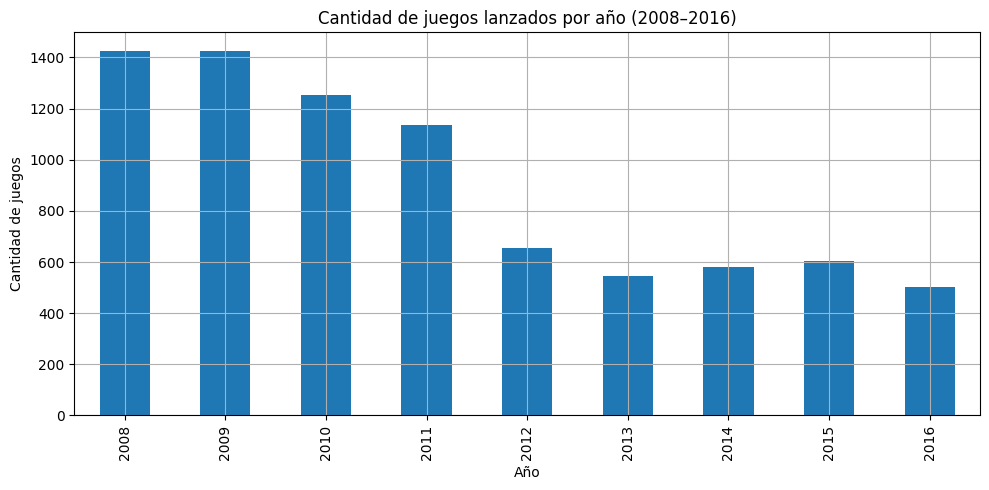

In [36]:
# Recalcular esta distribucion solo dentro del rango
recent_games_per_year = ice_recent_games.groupby('year_of_release')['name'].count()
print(recent_games_per_year)
plt.figure(figsize=(10,5))
recent_games_per_year.plot(kind='bar')
plt.title('Cantidad de juegos lanzados por año (2008–2016)')
plt.xlabel('Año')
plt.ylabel('Cantidad de juegos')
plt.grid(True)
plt.tight_layout()
plt.show()                

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />
Bien hecho!

Podemos observar una disminusión en la cantidad de videojuegos lanzados, esto puede debrse a que las compañías se enfocaron en videojuegos que tuvieron más éxito durante los primeros años
</div>


**3.6 Plataformas representadas en el periodo**


In [37]:
# Filtrar cuántos juegos hay para cada plataforma ordenadas de mayor a menor cantidad de juegos
platforms_recent_games = ice_recent_games['platform'].value_counts()
print("Cantidad de juegos por cada plataforma en el período 2008-2016:")
print(platforms_recent_games)

Cantidad de juegos por cada plataforma en el período 2008-2016:
DS      1402
PS3     1189
Wii     1057
X360     998
PSP      761
PC       662
3DS      512
PSV      429
PS4      392
PS2      332
XOne     247
WiiU     147
DC         1
XB         1
Name: platform, dtype: int64


**3.7 Plataformas líderes en ventas**

In [38]:
# Agrupar por plataforma las ventas durante este periodo
platform_sales_recent_games = (
    ice_recent_games.groupby('platform')['total_sales']
    .sum()
    .sort_values(ascending=False)
)
print("Cantidad de ventas por cada plataforma en el período 2008-2016:")
print(platform_sales_recent_games)

Cantidad de ventas por cada plataforma en el período 2008-2016:
platform
PS3     837.19
X360    805.96
Wii     601.26
DS      388.60
PS4     314.14
3DS     257.81
XOne    159.32
PC      151.29
PSP     136.38
PS2      86.39
WiiU     82.19
PSV      53.81
XB        0.18
DC        0.04
Name: total_sales, dtype: float64


**3.8 Evolución de ventas por plataforma**

In [39]:
#  Agrupar las ventas totales por año y por plataforma durante este periodo
sales_by_year_platform = (
    ice_recent_games.groupby(['year_of_release', 'platform'])['total_sales']
    .sum()
    .reset_index()
)

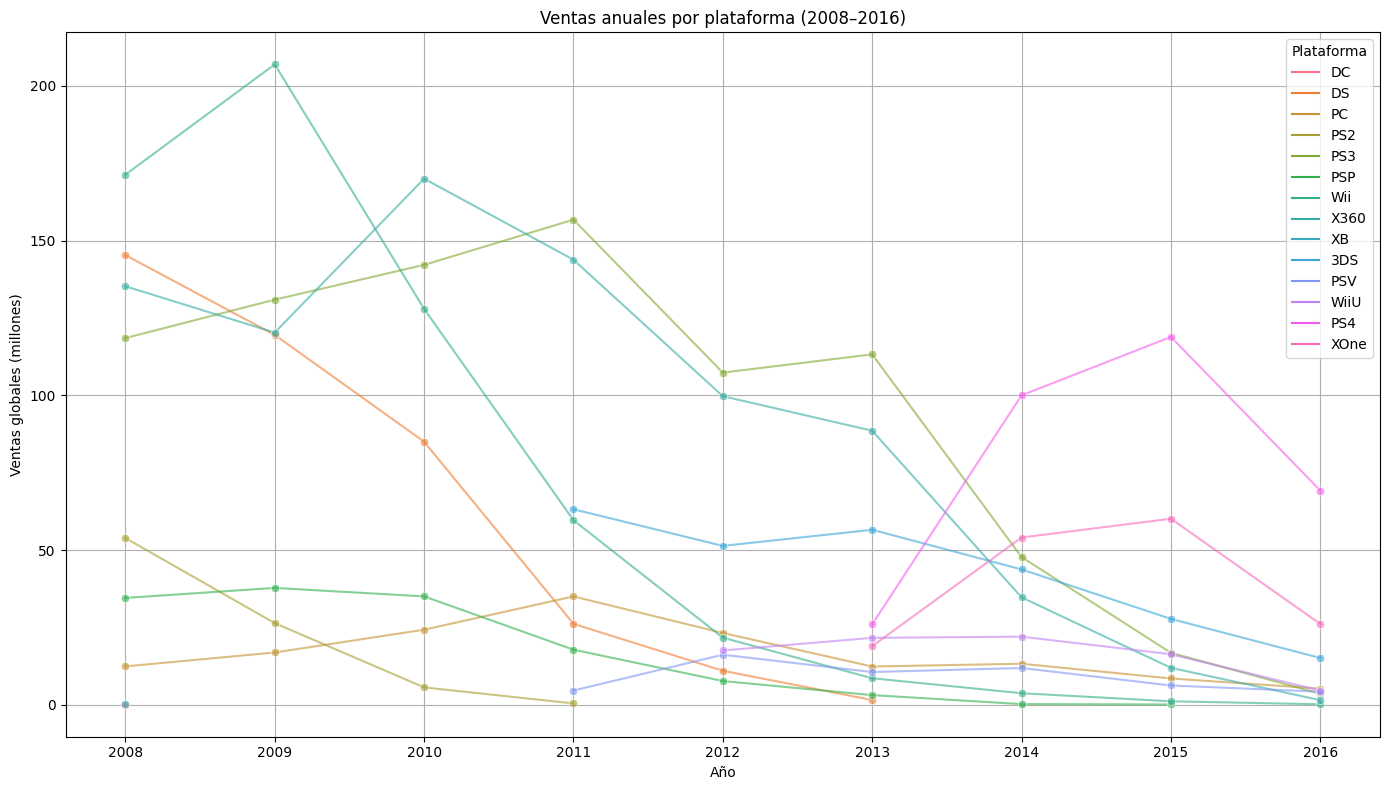

In [40]:
# Visualizar la evolucion de plataformas para ver cuáles crecen y cuáles se reducen
plt.figure(figsize=(14,8))
sns.lineplot(
    data=sales_by_year_platform,
    x='year_of_release', y='total_sales', hue='platform', marker='o', alpha=0.6
)
plt.title('Ventas anuales por plataforma (2008–2016)')
plt.xlabel('Año')
plt.ylabel('Ventas globales (millones)')
plt.legend(title='Plataforma')
plt.grid(True)
plt.tight_layout()
plt.show()

<div style="background-color: #e7f3ff; padding: 15px; border-radius: 5px; border-left: 5px solid #2196F3;">

COMENTARIOS:

Para empezar definí un período de 9 años, es decir, entre 2008 y 2016, según los gráficos cada año tiene más de 500 juegos al menos, lo que garantiza volumen de datos, y excluye años con pocos registros. Además, muchas plataformas tienen su periodo más rentable dentro de este rango.

Líderes en CANTIDAD de juegos:
1. DS (1,402 juegos)
2. PS3 (1,189 juegos) 
3. Wii (1,057 juegos)

Líderes en VENTAS totales:
1. PS3 (837.19M)
2. X360 (805.96M)
3. Wii (601.26M)

Mirando los gráficos y los datos hago algunas observaciones:
- PS3 y X360: Dominan las ventas, pero descienden después de 2013.
- Wii: Tiene un pico fuerte antes de 2011, pero luego una caída importante.
- DS y PSP: Muy activas al inicio del rango, muchos juegos pero ventas menores para la cantidad.
- PS4 y XOne: Lanzadas en 2013, ventas en crecimiento hasta 2016.
- 3DS: Estable desde su lanzamiento en 2011, parece una plataforma sólida.
- PC: Se le ven ventas más estables, con presencia durante 31 años en el mercado, pero sin picos.

Seleccioné PS4/PS3, Xbox One y 3DS como plataformas potencialmente rentables para los próximos años.
</div>

**3.9 Diagrama de caja para las ventas globales de todos los juegos por plataforma**

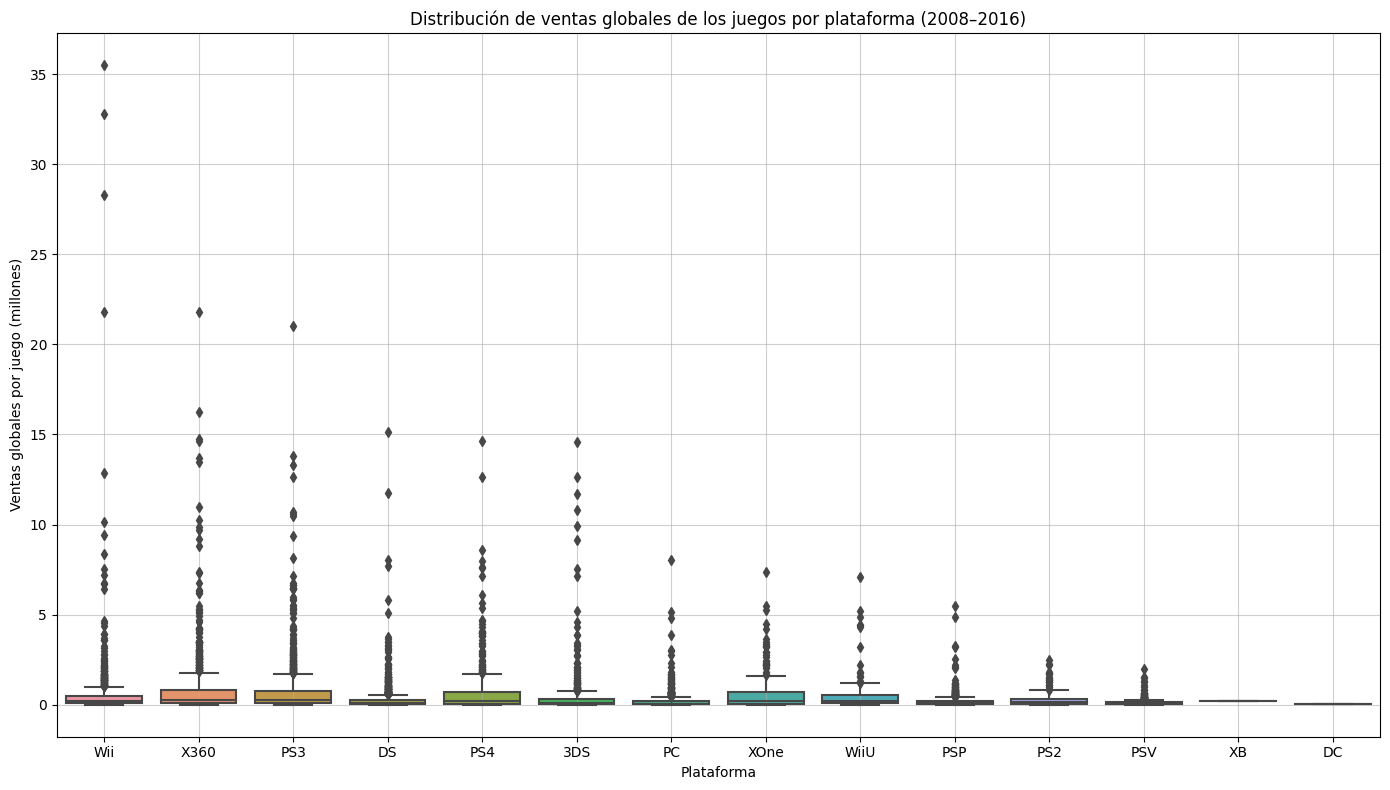

In [41]:
# Boxplot completo (para mostrar los outliers)
plt.figure(figsize=(14,8))
sns.boxplot(
    data=ice_recent_games,
    x='platform',
    y='total_sales',
)
plt.title('Distribución de ventas globales de los juegos por plataforma (2008–2016)')
plt.xlabel('Plataforma')
plt.ylabel('Ventas globales por juego (millones)')
plt.grid(True, alpha=0.6)
plt.tight_layout()
plt.show()

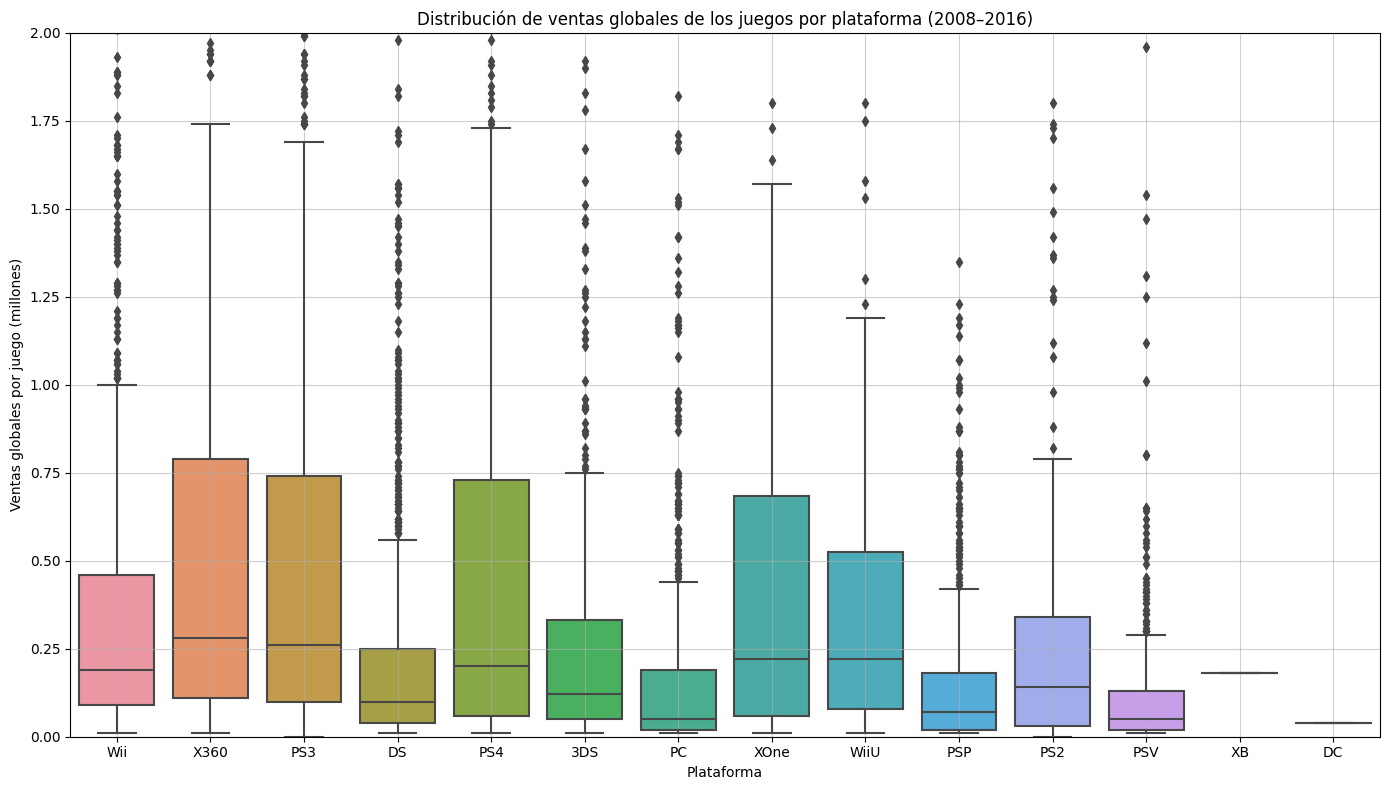

In [42]:
# Boxplot con el eje limitado (para ver la distribución típica)
plt.figure(figsize=(14,8))
sns.boxplot(
    data=ice_recent_games,
    x='platform',
    y='total_sales',
)
plt.ylim(0, 2)
plt.title('Distribución de ventas globales de los juegos por plataforma (2008–2016)')
plt.xlabel('Plataforma')
plt.ylabel('Ventas globales por juego (millones)')
plt.grid(True, alpha=0.6)
plt.tight_layout()
plt.show()

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />
Bien hecho!

El diagrama de caja nos muestra como en algunas plataformas las ventas estan consolidadas mientras que en otras consolas las ventas son muy disparejas lo que incrementa el rango intercuartil

Excelente uso de `plt.ylim(0, 2)`, otra manera de hacer que las cajas se muestren de una manera correcta es utilizando el parametro `plt.yscale('log')`
</div>


In [43]:
stats_platform = (
    ice_recent_games.groupby('platform')['total_sales']
    .agg(['median', 'mean', 'count'])
    .sort_values(by='median', ascending=False)
    .round(2)
)
print(stats_platform)

          median  mean  count
platform                     
X360        0.28  0.81    998
PS3         0.26  0.70   1189
WiiU        0.22  0.56    147
XOne        0.22  0.65    247
PS4         0.20  0.80    392
Wii         0.19  0.57   1057
XB          0.18  0.18      1
PS2         0.14  0.26    332
3DS         0.12  0.50    512
DS          0.10  0.28   1402
PSP         0.07  0.18    761
PC          0.05  0.23    662
PSV         0.05  0.13    429
DC          0.04  0.04      1


<div style="background-color: #e7f3ff; padding: 15px; border-radius: 5px; border-left: 5px solid #2196F3;">
COMENTARIOS
    
Las diferencias en las ventas globales por plataforma son claramente significativas. Según lo que se ve en los diagrama de caja, las medianas varían notablemente entre plataformas, lo que refleja la diversidad de mercados y audiencias dentro de la industria de los videojuegos. Por ejemplo, algunos títulos son éxitos masivos que superan los 5 millones de unidades, otros tienen desempeños mucho más pequeños, osea que tienen alta dispersión. Estas diferencias pueden deberse a los cambios en el ciclo de vida de cada plataforma y sus audiencias alrededor del mundo. Creo que siguiendo esta lógica, las plataformas más prometedoras son las que muestran alta rentabilidad por juego y potencial de crecimiento, como PS4 y Xbox One.
</div>

**3.10 Implicacion de Reseñas de Usuarios y Profesionales en ventas de PS4**

In [44]:
# Filtrar los juegos de PS4
ps4_games = ice_recent_games[ice_recent_games['platform'] == 'PS4']
print(f"Número de juegos de PS4: {len(ps4_games)}")

Número de juegos de PS4: 392


In [45]:
# Verificar nulos en reseña
print(ps4_games[['user_score', 'critic_score']].isna().sum())

user_score      135
critic_score    140
dtype: int64


In [46]:
# Juegos con ambas puntuaciones disponibles
ps4_reviews = ps4_games.dropna(subset=['user_score', 'critic_score'])
print(f"Juegos con ambas puntuaciones: {len(ps4_reviews)}")

Juegos con ambas puntuaciones: 249


<Figure size 1300x500 with 0 Axes>

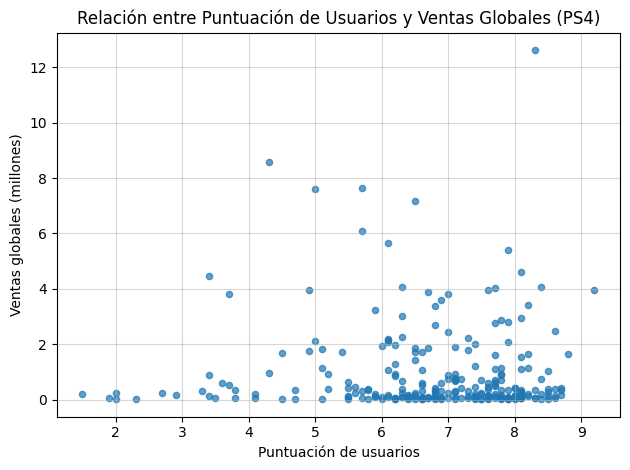

In [47]:
# Reseñas de usuarios vs ventas
plt.figure(figsize=(13,5))
ps4_reviews.plot(kind='scatter', alpha=0.7, x='user_score', y='total_sales')
plt.title('Relación entre Puntuación de Usuarios y Ventas Globales (PS4)')
plt.xlabel('Puntuación de usuarios')
plt.ylabel('Ventas globales (millones)')
plt.grid(True, alpha=0.5)
plt.tight_layout()
plt.show()

<Figure size 1300x500 with 0 Axes>

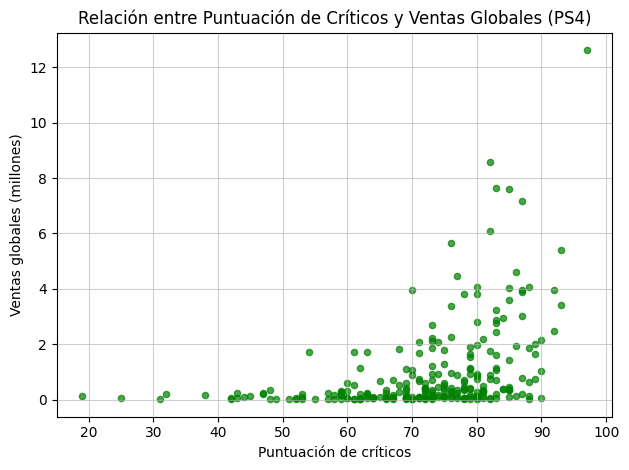

In [48]:
# Reseñas de críticos vs ventas
plt.figure(figsize=(13,5))
ps4_reviews.plot(kind='scatter', alpha=0.7, x='critic_score', y='total_sales',c='green')
plt.title('Relación entre Puntuación de Críticos y Ventas Globales (PS4)')
plt.xlabel('Puntuación de críticos')
plt.ylabel('Ventas globales (millones)')
plt.grid(True, alpha=0.6)
plt.tight_layout()
plt.show()

In [105]:
cor_user = ps4_reviews['user_score'].corr(ps4_reviews['total_sales'])
cor_critic = ps4_reviews['critic_score'].corr(ps4_reviews['total_sales'])

print(f"Correlación entre reseñas de usuarios y ventas: {cor_user:.2f}")
print(f"Correlación entre reseñas de críticos y ventas: {cor_critic:.2f}")

Correlación entre reseñas de usuarios y ventas: -0.03
Correlación entre reseñas de críticos y ventas: 0.41


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />
Correcto!

Buena manera de mostrar la correlación entre las ventas y las reseñas, como bien mencionas la correlación es debil-moderada por lo que no siempre las buenas reseñas van a implicar un gran numero de ventas
</div>


<div style="background-color: #e7f3ff; padding: 15px; border-radius: 5px; border-left: 5px solid #2196F3;">

COMENTARIOS:

Para analizar el impacto de las reseñas en las ventas, seleccioné la plataforma PS4, una de las más rentables y activas en el periodo 2008–2016. Filtré los juegos con puntuaciones disponibles tanto de usuarios como de críticos, y luego los gráficos de dispersión y el cálculo de correlaciones.

- Correlación entre reseñas de usuarios y ventas: −0.03.
Muy cercana a 0, practicamente no hay correlación. El gráfico muestra una dispersión amplia. Creería que tiene que ver porque las valoraciones de usuarios se generan después de la compra, reflejando más la satisfacción o insatisfacción post-venta que la decisión de compra inicial.

- Correlación entre reseñas de críticos y ventas: 0.41
Correlación moderada positiva, lo que sí podría decir que los juegos mejor valorados por críticos tienden a vender más.
Hay una especie de tendencia en el gráfico en el rango de puntuaciones entre 70 y 90 donde se podría asumir que hay impacto de las reseñas.

Así que para el caso específico de PS4, las reseñas de críticos parecen tener mayor influencia en el rendimiento comercial de los juegos de PS4 que las reseñas de usuarios.

</div>

**3.11 Analizar juegos que estan presentes en múltiples plataformas**

In [49]:
# Buscamos los juegos que aparecen en más de una plataforma:
multiplatform_games = ice_recent_games[ice_recent_games['name'].duplicated(keep=False)]
print(f"Juegos multiplataforma encontrados: {len(multiplatform_games)}")
print(multiplatform_games[['name', 'platform', 'total_sales']].head(20))

Juegos multiplataforma encontrados: 4367
                              name platform  total_sales
16              Grand Theft Auto V      PS3        21.05
23              Grand Theft Auto V     X360        16.27
29  Call of Duty: Modern Warfare 3     X360        14.73
31       Call of Duty: Black Ops 3      PS4        14.63
32         Call of Duty: Black Ops     X360        14.62
34      Call of Duty: Black Ops II      PS3        13.79
35      Call of Duty: Black Ops II     X360        13.68
36  Call of Duty: Modern Warfare 2     X360        13.47
37  Call of Duty: Modern Warfare 3      PS3        13.33
41         Call of Duty: Black Ops      PS3        12.63
42              Grand Theft Auto V      PS4        12.62
51             Grand Theft Auto IV     X360        11.00
55  Call of Duty: Modern Warfare 2      PS3        10.61
57             Grand Theft Auto IV      PS3        10.50
60            Call of Duty: Ghosts     X360        10.24
61                    Just Dance 3      Wii    

In [50]:
# Ejemplo 1: Just Dance 3 en todas sus plataformas
example_game = "Just Dance 3" 
multiplatform_games = ice_recent_games[ice_recent_games['name'] == example_game]
print(f"Ventas de {example_game} por plataforma:")
print(multiplatform_games[['platform', 'total_sales', 'critic_score', 'user_score']])

Ventas de Just Dance 3 por plataforma:
     platform  total_sales  critic_score  user_score
61        Wii        10.12          74.0         7.8
846      X360         2.02          70.0         7.7
3235      PS3         0.62          75.0         6.0


In [51]:
# Ejemplo 2: FIFA 16 en todas sus plataformas
example_game_two = "FIFA 16" 
multiplatform_games = ice_recent_games[ice_recent_games['name'] == example_game_two]
print(f"Ventas de {example_game_two} por plataforma:")
print(multiplatform_games[['platform', 'total_sales', 'critic_score', 'user_score']])

Ventas de FIFA 16 por plataforma:
     platform  total_sales  critic_score  user_score
77        PS4         8.58          82.0         4.3
417      XOne         3.25          84.0         4.4
552       PS3         2.70           NaN         3.2
1182     X360         1.57           NaN         2.9
7575       PC         0.20          81.0         4.4


In [52]:
# Ejemplo 3: Grand Theft Auto V en todas sus plataformas
example_game_three = "Grand Theft Auto V" 
multiplatform_games = ice_recent_games[ice_recent_games['name'] == example_game_three]
print(f"Ventas de {example_game_three} por plataforma:")
print(multiplatform_games[['platform', 'total_sales', 'critic_score', 'user_score']]) 

Ventas de Grand Theft Auto V por plataforma:
     platform  total_sales  critic_score  user_score
16        PS3        21.05          97.0         8.2
23       X360        16.27          97.0         8.1
42        PS4        12.62          97.0         8.3
165      XOne         5.47          97.0         7.9
1730       PC         1.17          96.0         7.9


<div style="background-color: #e7f3ff; padding: 15px; border-radius: 5px; border-left: 5px solid #2196F3;">

COMENTARIOS:

Decidí hacer el análisis comparativo eligiendo al azar: Just Dance 3, FIFA 16 y Grand Theft Auto V.

- En el caso de Just Dance 3, la versión para Wii vendió más de 10 millones, mientras que en Xbox 360 y PS3 las ventas fueron considerablemente menores. 
- Aunque  FIFA 16 está disponible en múltiples plataformas, PS4 concentra la mayor parte de las ventas, seguida por Xbox One. 
- A pesar de tener reseñas excelentes en todas las plataformas, Grand Theft Auto V, en las versiones originales para PS3 y Xbox 360 superan ampliamente en ventas a las reediciones para PS4, Xbox One y PC.

Lo anterior sí demuestra que la plataforma en la que se lanza un juego tiene un impacto directo y significativo en su rendimiento comercial, incluso cuando el contenido es idéntico. Podrían influir el tipo de público de cada plataforma, el momento del lanzamiento, la experiencia de juego ofrecida y el momento de ciclo de vida de la consola.
Por lo tanto, al pensar en ventas o lanzamientos futuros, sí es fundamental considerar en qué plataforma se lanza y cuándo.

</div>

**3.12 Distribución general de los juegos por género**

Cantidad de juegos por género:
Action          1988
Misc             994
Sports           958
Adventure        869
Role-Playing     783
Shooter          583
Simulation       459
Racing           403
Fighting         308
Strategy         284
Puzzle           257
Platform         244
Name: genre, dtype: int64


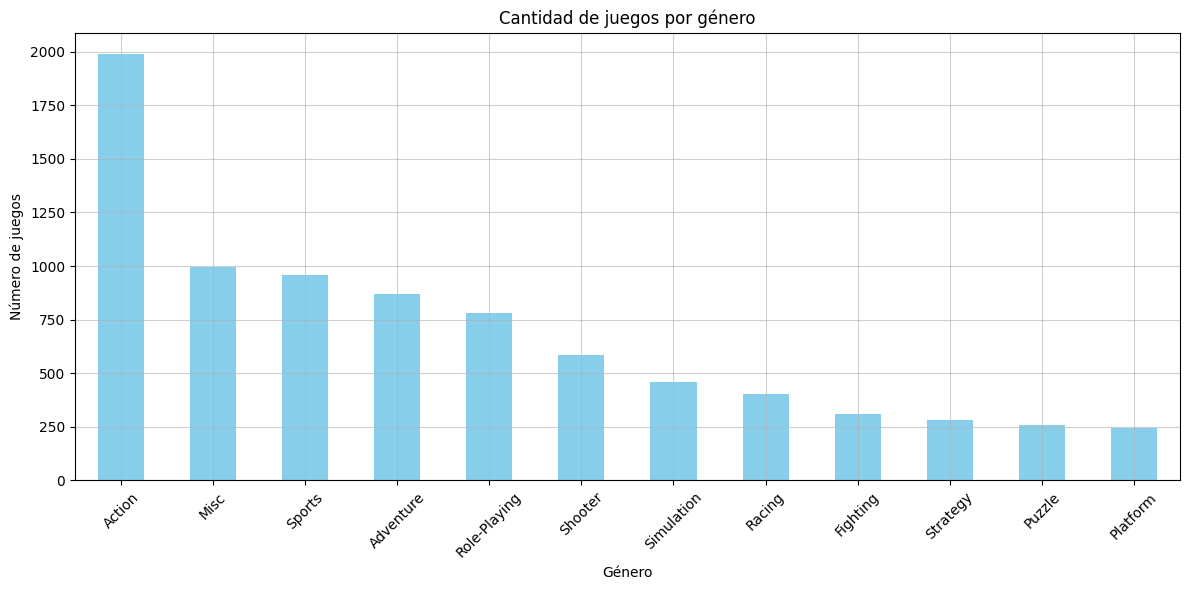

In [53]:
# Contar cuántos juegos hay por género
genre_counts = ice_recent_games['genre'].value_counts()
print("Cantidad de juegos por género:")
print(genre_counts)

# Visualizar la cantidad de juegos por género
plt.figure(figsize=(12, 6))
genre_counts.plot(kind='bar', color='skyblue')
plt.title('Cantidad de juegos por género')
plt.xlabel('Género')
plt.ylabel('Número de juegos')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.6)
plt.tight_layout()
plt.show()

<div style="background-color: #e7f3ff; padding: 15px; border-radius: 5px; border-left: 5px solid #2196F3;">
Cantidad de juegos por género:
    
- El género Action domina en cantidad de juegos, con casi 2000 títulos, seguido por Misc y Sports.
- Géneros como Puzzle y Platform tienen muy pocos lanzamientos, lo que sugiere menor presencia en el mercado.

</div>

Total de ventas por género:
genre
Action          945.74
Shooter         608.19
Sports          560.34
Role-Playing    421.57
Misc            396.43
Racing          226.41
Platform        195.38
Simulation      150.78
Fighting        148.51
Adventure       105.86
Strategy         59.73
Puzzle           55.62
Name: total_sales, dtype: float64


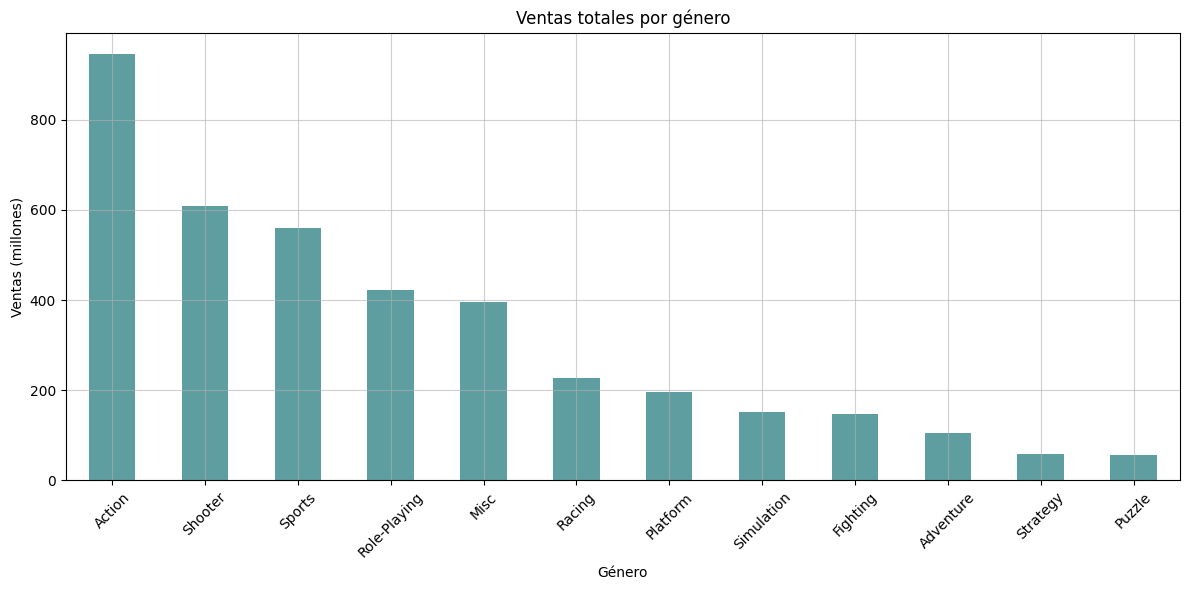

In [54]:
# Contar ventas totales por género
genre_sales = ice_recent_games.groupby('genre')['total_sales'].sum().sort_values(ascending=False)
print("Total de ventas por género:")
print(genre_sales)

# Visualizar las ventas totales por género
plt.figure(figsize=(12, 6))
genre_sales.plot(kind='bar', color='cadetblue')
plt.title('Ventas totales por género')
plt.xlabel('Género')
plt.ylabel('Ventas (millones)')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.6)
plt.tight_layout()
plt.show()

<div style="background-color: #e7f3ff; padding: 15px; border-radius: 5px; border-left: 5px solid #2196F3;">

Ventas totales por género
- Action, Shooter y Sports lideran en ventas globales, lo que indica fuerte demanda del público.
- Géneros como Puzzle, Strategy y Adventure tienen ventas totales bajas.

Los géneros más vendidos parecen coincidir con los más lanzados. Aunque, algunos géneros con pocos juegos, como Shooter, logran ventas totales muy altas.
</div>

Ventas promedio por género:
genre
Shooter         1.043208
Platform        0.800738
Sports          0.584906
Racing          0.561811
Role-Playing    0.538404
Fighting        0.482175
Action          0.475724
Misc            0.398823
Simulation      0.328497
Puzzle          0.216420
Strategy        0.210317
Adventure       0.121818
Name: total_sales, dtype: float64


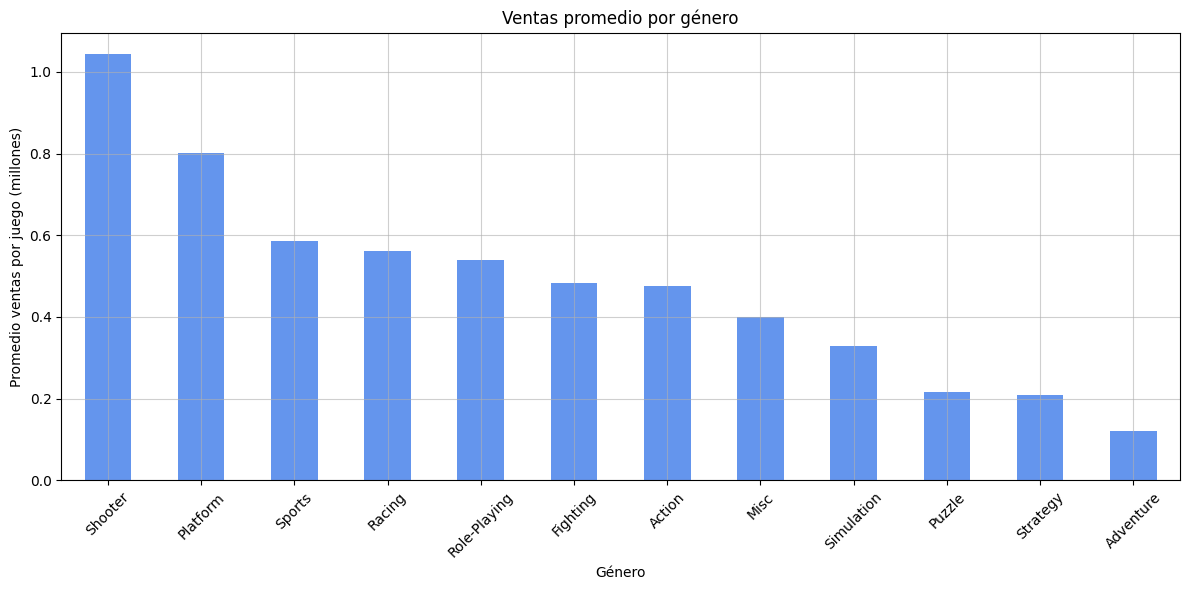

In [55]:
#Contar ventas promedio por género
genre_mean = ice_recent_games.groupby('genre')['total_sales'].mean().sort_values(ascending=False)
print("Ventas promedio por género:")
print(genre_mean)

# Visualizar las ventas promedio por género
plt.figure(figsize=(12, 6))
genre_mean.plot(kind='bar', color='cornflowerblue')
plt.title('Ventas promedio por género')
plt.xlabel('Género')
plt.ylabel('Promedio ventas por juego (millones)')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.6)
plt.tight_layout()
plt.show()

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />
Correcto!

Buena manera de presentar los datos de distintas formas, podemos ver claramente cuales son los géneros preferidos de las personas aunque las cantidades pueden indicar inicialmente otra cosa, las observaciones que haces me parecen buenas también
</div>


<div style="background-color: #e7f3ff; padding: 15px; border-radius: 5px; border-left: 5px solid #2196F3;">

Ventas promedio por género:

Los géneros más rentables no siempre son los más frecuentes. Se observa en géneros como Shooter y Platform destacan por su ventas promedio por juego, lo que los convierte en nichos altamente rentables.
En cambio, géneros como Adventure, Puzzle y Strategy, aunque presentes en el catálogo, tienen ventas bajas tanto en total como por unidad.
Por lo tanto, al evaluar la rentabilidad de un género, es clave considerar no solo cuántos juegos se lanzan, sino cuánto venden en promedio.

</div>

### Paso 4. Crea un perfil de usuario para cada región

In [56]:
# Calcular los géneros mas vendidos en cada region
print("Ventas por género en cada región:")

na_genre = (
ice_recent_games.groupby('genre')['na_sales']
    .sum().sort_values(ascending=False))
print("\nTop 5 géneros en Norteamérica:")
print(na_genre.head(5))

eu_genre = (
ice_recent_games.groupby('genre')['eu_sales']
    .sum().sort_values(ascending=False))
print("\nTop 5 géneros en Europa:")
print(na_genre.head(5))

jp_genre = (
ice_recent_games.groupby('genre')['jp_sales']
    .sum().sort_values(ascending=False))
print("\nTop 5 géneros en Japón:")
print(na_genre.head(5))

Ventas por género en cada región:

Top 5 géneros en Norteamérica:
genre
Action          433.74
Shooter         311.26
Sports          276.27
Misc            211.61
Role-Playing    155.81
Name: na_sales, dtype: float64

Top 5 géneros en Europa:
genre
Action          433.74
Shooter         311.26
Sports          276.27
Misc            211.61
Role-Playing    155.81
Name: na_sales, dtype: float64

Top 5 géneros en Japón:
genre
Action          433.74
Shooter         311.26
Sports          276.27
Misc            211.61
Role-Playing    155.81
Name: na_sales, dtype: float64


In [57]:
# Calcular las plataformas mas vendidas en cada región
print("Ventas por plataforma en cada región:")

na_platforms = (
    ice_recent_games.groupby('platform')['na_sales']
    .sum().sort_values(ascending=False)
)
print("\nTop 5 plataformas en Norteamérica:")
print(na_platforms.head(5))

eu_platforms = (
    ice_recent_games.groupby('platform')['eu_sales']
    .sum().sort_values(ascending=False)
)
print("\nTop 5 plataformas en Europe:")
print(eu_platforms.head(5))

jp_platforms = (
    ice_recent_games.groupby('platform')['jp_sales']
    .sum().sort_values(ascending=False)
)
print("\nTop 5 plataformas en Japón:")
print(jp_platforms.head(5))

Ventas por plataforma en cada región:

Top 5 plataformas en Norteamérica:
platform
X360    490.69
PS3     349.13
Wii     332.87
DS      198.73
PS4     108.74
Name: na_sales, dtype: float64

Top 5 plataformas en Europe:
platform
PS3     293.73
X360    234.88
Wii     170.74
PS4     141.09
PC       92.17
Name: eu_sales, dtype: float64

Top 5 plataformas en Japón:
platform
3DS    100.62
DS      76.12
PS3     74.11
PSP     60.46
Wii     47.01
Name: jp_sales, dtype: float64


<div style="background-color: #e7f3ff; padding: 15px; border-radius: 5px; border-left: 5px solid #2196F3;">
    
COMENTARIOS: Perfiles Regionales

**Perfil de usuario Norteamérica (NA)**

- Plataformas más vendidas: Xbox 360 (490.69M), PS3 (349.13M), Wii (332.87M), DS (198.73M), PS4 (108.74M)
- Géneros más populares: Action, Shooter, Sports, Misc, Role-Playing
- Se ve la fuerte presencia en el mercado familiar, con una inclinación hacia juegos competitivos y deportivos.

**Perfil de usuario Europa (EU)**
- Plataformas más vendidas: PS3 (293.73M), Xbox 360 (234.88M), Wii (170.74M), PS4 (141.09M), PC (92.17M)
- Géneros más populares: Action, Shooter, Sports, Misc, Role-Playing
- La venta más equilibrada entre consolas y PC puede mostrar que el mercado Europeo es más diverso en cuanto a dispositivos. Los géneros más vendidos coiniciden con los usuarios americanos. 

**Perfil de usuario Japón (JP)**
- Plataformas más vendidas: 3DS (100.62M), DS (76.12M), PS3 (74.11M), PSP (60.46M), Wii (47.01M)
- Géneros más populares: Role-Playing, Action, Platform, Simulation, Adventure
- El usuario japonés se inclina fuertemente por plataformas portátiles como 3DS, DS y PSP. El género más vendido es Role-Playing, seguido por Platform y Simulation, lo que indica una preferencia por juegos narrativos, estratégicos y de exploración. La baja presencia de Shooter y Sports refleja diferencias culturales respecto a Occidente.

Los perfiles regionales muestran que las preferencias de género y plataforma varían significativamente entre mercados. Estos patrones deben considerarse al modelar ventas 
futuras o diseñar estrategias de lanzamiento por región.
</div>

In [58]:
# Calcular las ventas totales por clasificación en cada region
print("Ventas por clasificación ESRB en cada región:")

na_esrb = (
    ice_recent_games.groupby('rating')['na_sales']
    .sum().sort_values(ascending=False)
)
print("\nVentas por clasificación ESRB en Norteamérica:")
print(na_esrb)

eu_esrb = (
    ice_recent_games.groupby('rating')['eu_sales']
    .sum().sort_values(ascending=False)
)
print("\nVentas por clasificación ESRB en Europe:")
print(eu_esrb)

jp_esrb = (
    ice_recent_games.groupby('rating')['jp_sales']
    .sum().sort_values(ascending=False)
)
print("\nVentas por clasificación ESRB en Japón:")
print(jp_esrb)


Ventas por clasificación ESRB en cada región:

Ventas por clasificación ESRB en Norteamérica:
rating
E            536.93
M            502.60
T            303.41
E10+         251.88
Not Rated    218.51
EC             1.32
RP             0.00
Name: na_sales, dtype: float64

Ventas por clasificación ESRB en Europe:
rating
M            362.65
E            326.61
Not Rated    188.85
T            187.62
E10+         144.53
RP             0.03
EC             0.00
Name: eu_sales, dtype: float64

Ventas por clasificación ESRB en Japón:
rating
Not Rated    220.60
E             77.17
T             64.51
M             39.33
E10+          25.67
EC             0.00
RP             0.00
Name: jp_sales, dtype: float64


<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />

Las tablas que haces en los últimos ejercicios me parecen buenas, recomiendo acompañarlas con gráficas que resalten las similitudes/diferencias de cada una de las regiones
</div>


<div style="background-color: #e7f3ff; padding: 15px; border-radius: 5px; border-left: 5px solid #2196F3;">
    
COMENTARIOS: Ventas totales por clasificación ESRB en cada region

**Norteamérica (NA)**
- Clasificación más vendida: E (Everyone) con 536.93M, seguida muy de cerca por M (Mature) con 502.60M.
- Hay una distribución equilibrada entre juegos para todo público y juegos para adultos.

**Europa (EU)**
- Clasificación más vendida: M (Mature) con 362.65M, seguida por E (Everyone) con 326.61M.
- Europa muestra una preferencia más marcada por juegos maduros, aunque los títulos E también tienen fuerte presencia.

**Japón (JP)**
- Clasificación más vendida: Not Rated con 220.60M — muy por encima de cualquier otra categoría.
- En Japón, la clasificación ESRB no parecen tener un impacto significativo. 

Al aprecer, la influencia de ESRB es regional, y tiene presencia solo en algunas regiones. 
</div>

### Paso 5. Prueba de hipótesis

**5.1 Hipótesis A: Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas.**

In [59]:
H0_plataformas = "Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC no difieren"
H1_plataformas = "Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC difieren"

In [60]:
# Filtrar las dos plataformas
xbox_data = ice_recent_games[ice_recent_games['platform'] == 'XOne']['user_score'] 
pc_data = ice_recent_games[ice_recent_games['platform'] == 'PC']['user_score'] 

In [61]:
# Aplicar prueba 
alpha = 0.05
results = stats.ttest_ind(xbox_data, pc_data, nan_policy='omit')

print('El valor p es:', results.pvalue)

if (results.pvalue < alpha):
    print("Rechazamos la hipótesis nula:")
    print(H0_plataformas)
    print("Porque existe evidencia estadística significativa de que son diferentes.")
else:
    print("No podemos rechazar la hipótesis nula:")
    print(H0_plataformas)
    print("'No hay evidencia estadística suficiente para afirmar que son diferentes.'")
print()
print(f'Media Xbox One: {xbox_data.mean():.4f}')
print(f'Media PC: {pc_data.mean():.4f}')

El valor p es: 0.1295458611061516
No podemos rechazar la hipótesis nula:
Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC no difieren
'No hay evidencia estadística suficiente para afirmar que son diferentes.'

Media Xbox One: 6.5214
Media PC: 6.7175


<div style="background-color: #e7f3ff; padding: 15px; border-radius: 5px; border-left: 5px solid #2196F3;">

Se obtuvo un valor p de 0.1295, lo cual es mayor que el umbral establecido de 0.05. Por lo tanto, no se rechaza la hipótesis nula, y no hay evidencia estadística suficiente para afirmar que las calificaciones promedio difieren entre ambas plataformas. Las medias observadas fueron 6.52 para Xbox One y 6.72 para PC, lo que indica una diferencia leve pero no significativa.
</div>

**5.2  Hipótesis B: Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.**

In [62]:
H0_géneros = "Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes no son diferentes."
H1_géneros = "Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes."

In [63]:
print(ice_recent_games['genre'].unique())

['Racing' 'Sports' 'Platform' 'Misc' 'Action' 'Role-Playing' 'Shooter'
 'Fighting' 'Simulation' 'Strategy' 'Puzzle' 'Adventure']


In [64]:
# Filtrar los dos géneros
action_data = ice_recent_games[ice_recent_games['genre'] == 'Action']['user_score']  
sports_data = ice_recent_games[ice_recent_games['genre'] == 'Sports']['user_score']

In [65]:
# Aplicar prueba t-test
alpha = 0.05
results = stats.ttest_ind(action_data, sports_data, nan_policy='omit')

print('valor p:', results.pvalue)

if (results.pvalue < alpha):
    print("Rechazamos la hipótesis nula:")
    print(H0_géneros)
    print("Porque existe evidencia estadística significativa de que son diferentes.")
else:
    print("No podemos rechazar la hipótesis nula:")
    print(H0_géneros)
    print("'No hay evidencia estadística suficiente para afirmar que son diferentes.'")
    
print()
print(f'Media juegos de accion: {action_data.mean():.4f}')
print(f'Media juegos de deportes: {sports_data.mean():.4f}')

valor p: 1.9150743334562065e-15
Rechazamos la hipótesis nula:
Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes no son diferentes.
Porque existe evidencia estadística significativa de que son diferentes.

Media juegos de accion: 6.8544
Media juegos de deportes: 6.2159


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />


El planteamiento de la hipótesis me parece correcto en ambos casos, bien hecho!
</div>


<div style="background-color: #e7f3ff; padding: 15px; border-radius: 5px; border-left: 5px solid #2196F3;">

Se obtuvo un valor p de 1.9150743334562065e-15, un valor extremadamente bajo comparado con el umbral de 0.05 establecido, lo que indica una diferencia altamente significativa. Por lo tanto, se rechaza la hipótesis nula, y se concluye que las calificaciones promedio de los usuarios sí difieren entre ambos géneros.

</div>

<div style="background-color: #e7f3ff; padding: 15px; border-radius: 5px; border-left: 5px solid #2196F3;">

Formulé dos pruebas de hipótesis para comparar plataformas y géneros. Las construí de la siguiente manera pensando siempre que la hipótesis nula es el status quo que no cambie, y la alternativa es lo que se quiere probar, el cambio.

1. Comparación por plataforma: Xbox One vs PC
- Hipótesis nula (H₀): Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC no difieren.
- Hipótesis alternativa (H₁): Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC difieren.

2. Comparación por género: Acción vs Deportes
- Hipótesis nula (H₀): Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes no son diferentes.
- Hipótesis alternativa (H₁): Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.

Importante:
- Apliqué una prueba t (ttest_ind), o sea muestras independientes.
- Tipo de prueba: Dos colas, ya que se buscaba detectar cualquier diferencia (mayor o menor) entre los promedios.
- Nivel de significancia: 0.05, el estándar.
- Utilicé como aprendí en el proyecto anterior nan_policy='omit' para excluir valores nulos y evitar sesgos en el cálculo.

</div>

<div style="background-color: #e7f3ff; padding: 15px; border-radius: 5px; border-left: 5px solid #2196F3;">

**CONCLUSIÓN FINAL**

A lo largo del análisis, fui descubriendo cómo distintos factores influyen en las ventas de videojuegos. Primero noté que las plataformas tienen un impacto fuerte: algunos juegos venden muchísimo en una consola y muy poco en otra, aunque sean el mismo título. También vi que las reseñas de críticos parecen tener más relación con las ventas que las opiniones de los usuarios, al menos dentro de una misma plataforma como PS4.
Al comparar géneros, aprendí que no siempre los más frecuentes son los más rentables. Por ejemplo, los juegos tipo Shooter y Platform tienen pocas entregas pero venden muy bien por unidad. En cambio, géneros como Puzzle o Adventure tienen muchos títulos pero ventas más bajas.
También observé que las preferencias cambian según la región: en Norteamérica y Europa dominan los juegos de acción y deportes, mientras que en Japón se prefieren los roleplay y las consolas portátiles. Las clasificaciones ESRB influyen en las ventas en occidente, pero no en Japón, donde se usa otro sistema.
Finalmente, probé dos hipótesis estadísticas y aprendí que no siempre las diferencias que parecen grandes lo son realmente. En el caso de Xbox One vs PC, las calificaciones de usuarios no fueron tan distintas. Pero entre los géneros Acción y Deportes, sí hubo una diferencia significativa.
En resumen, aprendí a mirar los datos con más criterio y a justificar cada paso del análisis.

</div>

## Comentario general del revisor
<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />
Has realizado un buen trabajo, me doy cuenta de que has aplicado los conocimientos que has adquirido durante el curso, las observaciones que has hecho durante todo el ejercicio me han parecido bastante buenas, son un gran apoyo a la hora de revisar el proyecto ya que me dan a entender que el tema te ha quedado claro y has podido avanzar correctamente.

    
Continúa con el buen trabajo y mucho éxito en el siguiente Sprint!
</div>


<div class="alert alert-block alert-success">
<b>Aspectos positivos del proyecto</b> <a class="tocSkip"></a><br />

- Las observaciones intermedias, así como las conclusiones finales me parecen bastante detalladas
- Las graficas utilizadas me parecen del tipo correcto
- El proyecto esta ordenado
    
</div>

<div class="alert alert-block alert-warning">
<b>Aspectos que pueden mejorar del proyecto</b> <a class="tocSkip"></a><br />

- Se pueden incluir más graficas para resaltar las observaciones o datos que muestras, especialmente en la parte donde se comparan las distintas regiones del mundo

</div>

